In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The `modelnet40v1` dataset comprises 40 classes of objects:

In [9]:
from pathlib import Path

data_dir = Path('./data/modelnet40v1')
for idx, class_dir in enumerate(data_dir.iterdir()):
    print(f'Class {idx} - {class_dir.name.upper()}')

Class 0 - AIRPLANE
Class 1 - BATHTUB
Class 2 - BED
Class 3 - BENCH
Class 4 - BOOKSHELF
Class 5 - BOTTLE
Class 6 - BOWL
Class 7 - CAR
Class 8 - CHAIR
Class 9 - CONE
Class 10 - CUP
Class 11 - CURTAIN
Class 12 - DESK
Class 13 - DOOR
Class 14 - DRESSER
Class 15 - FLOWER_POT
Class 16 - GLASS_BOX
Class 17 - GUITAR
Class 18 - KEYBOARD
Class 19 - LAMP
Class 20 - LAPTOP
Class 21 - MANTEL
Class 22 - MONITOR
Class 23 - NIGHT_STAND
Class 24 - PERSON
Class 25 - PIANO
Class 26 - PLANT
Class 27 - RADIO
Class 28 - RANGE_HOOD
Class 29 - SINK
Class 30 - SOFA
Class 31 - STAIRS
Class 32 - STOOL
Class 33 - TABLE
Class 34 - TENT
Class 35 - TOILET
Class 36 - TV_STAND
Class 37 - VASE
Class 38 - WARDROBE
Class 39 - XBOX


 Each object class is divided into a `train` and `test` dataset. We shold note that there is no dedicated `validation` set so for simplicity we will be validating our model at training time using the `test` data.

In [8]:
for class_dataset_path in class_dir.iterdir():
    print(class_dataset_path)

data/modelnet40v1/xbox/test
data/modelnet40v1/xbox/train


Within each dataset we can find a list of images of 3D object shapes made in CAD. There is a set of unique objects that we will call `instances` going forward. For each unique object instance we get multiple images viewing them from multiple angles. The unique object instance identification number is noted in the filename, followed by the instance image number:

In [12]:
num_examples = 20
for idx, image_path in enumerate(class_dataset_path.iterdir()):
    print(image_path)
    if idx > num_examples: 
        print('...')
        break

data/modelnet40v1/xbox/train/xbox_000000015_001.jpg
data/modelnet40v1/xbox/train/xbox_000000015_002.jpg
data/modelnet40v1/xbox/train/xbox_000000015_003.jpg
data/modelnet40v1/xbox/train/xbox_000000015_004.jpg
data/modelnet40v1/xbox/train/xbox_000000015_005.jpg
data/modelnet40v1/xbox/train/xbox_000000015_006.jpg
data/modelnet40v1/xbox/train/xbox_000000015_007.jpg
data/modelnet40v1/xbox/train/xbox_000000015_008.jpg
data/modelnet40v1/xbox/train/xbox_000000015_009.jpg
data/modelnet40v1/xbox/train/xbox_000000015_010.jpg
data/modelnet40v1/xbox/train/xbox_000000015_011.jpg
data/modelnet40v1/xbox/train/xbox_000000015_012.jpg
data/modelnet40v1/xbox/train/xbox_000000020_001.jpg
data/modelnet40v1/xbox/train/xbox_000000020_002.jpg
data/modelnet40v1/xbox/train/xbox_000000020_003.jpg
data/modelnet40v1/xbox/train/xbox_000000020_004.jpg
data/modelnet40v1/xbox/train/xbox_000000020_005.jpg
data/modelnet40v1/xbox/train/xbox_000000020_006.jpg
data/modelnet40v1/xbox/train/xbox_000000020_007.jpg
data/modelne

We will look at some image examples shortly but first let's instantiate the defined dataset classes to make the analysis easier:

In [13]:
from dataset_classes.mvcnn_dataset import MVCNNDataset

train_data = MVCNNDataset('train', verbose=False)
val_data = MVCNNDataset('test', verbose=False)

Now, let's examine the training data in a DataFrame form:

In [20]:
train_df = train_data.get_summary_df()
display(train_df.head())
display(train_df.describe())

,class_id,class_name,num_instances,num_images
0,0,airplane,80,960
1,1,bathtub,80,960
2,2,bed,80,960
3,3,bench,80,960
4,4,bookshelf,80,960


,class_id,num_instances,num_images
count,40.000000,40.000000,40.000000
mean,19.500000,79.575000,954.900000
std,11.690452,2.530709,30.368506
min,0.000000,64.000000,768.000000
25%,9.750000,80.000000,960.000000
50%,19.500000,80.000000,960.000000
75%,29.250000,80.000000,960.000000
max,39.000000,80.000000,960.000000


A quick glance shows that most classes are balanced and have exactly 80 instances and 960 images (12 images per unique instance). The classes that are underrepresented in the training dataset are shown below:

In [23]:
train_df[
    (train_df['num_instances'] < train_df['num_instances'].max())
    | (train_df['num_images'] < train_df['num_images'].max())
]

,class_id,class_name,num_instances,num_images
6,6,bowl,64,768
10,10,cup,79,948


Let's see if the same holds for the validation set:

In [24]:
val_df = val_data.get_summary_df()
display(val_df.describe())
display(val_df[
    (val_df['num_instances'] < val_df['num_instances'].max())
    | (val_df['num_images'] < val_df['num_images'].max())
])

,class_id,num_instances,num_images
count,40.000000,40.0,40.0
mean,19.500000,20.0,240.0
std,11.690452,0.0,0.0
min,0.000000,20.0,240.0
25%,9.750000,20.0,240.0
50%,19.500000,20.0,240.0
75%,29.250000,20.0,240.0
max,39.000000,20.0,240.0


,class_id,class_name,num_instances,num_images


Unlike the training set, the validation set is perfectly balanced, with 40 instances / 240 images for each class

Now, let's look at the images themselves. We'll take a random instance from each of the classes of the training dataset:

Let's view random instances of all classes:

airplane
0034


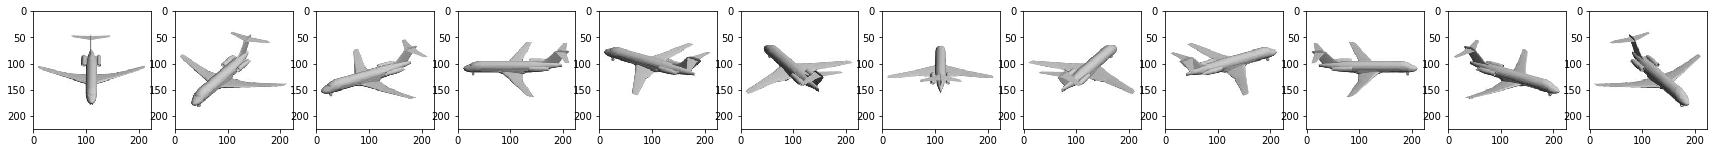

bathtub
000000084


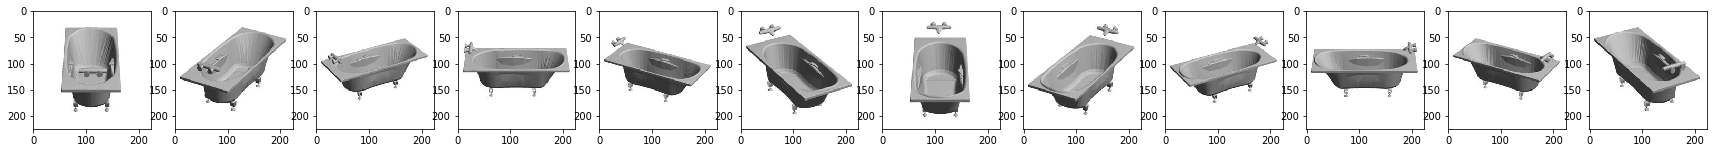

bed
000000484


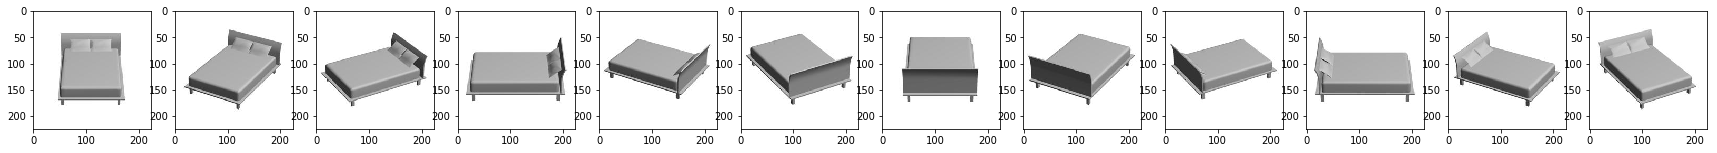

bench
000000221


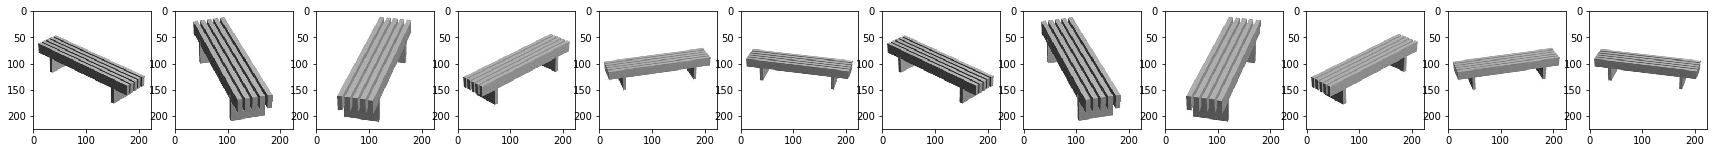

bookshelf
000000203


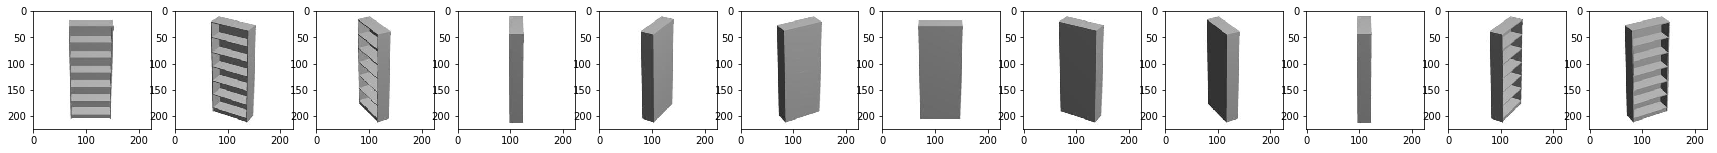

bottle
000000024


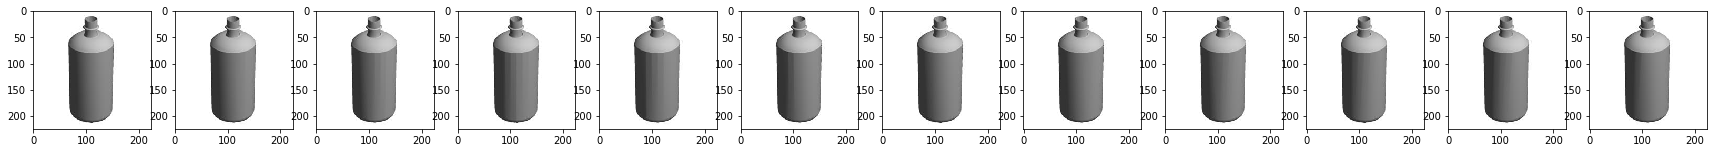

bowl
000000209


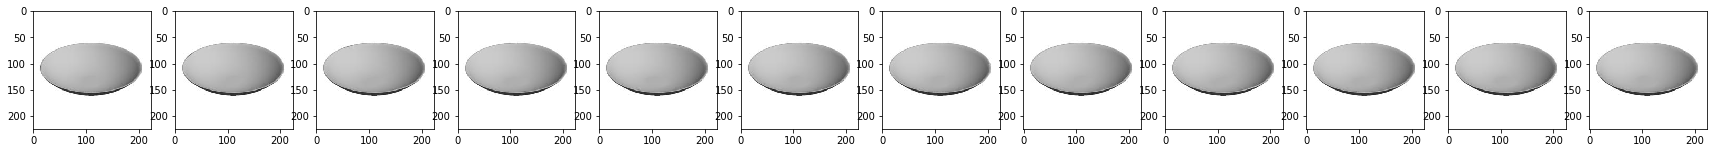

car
000000032


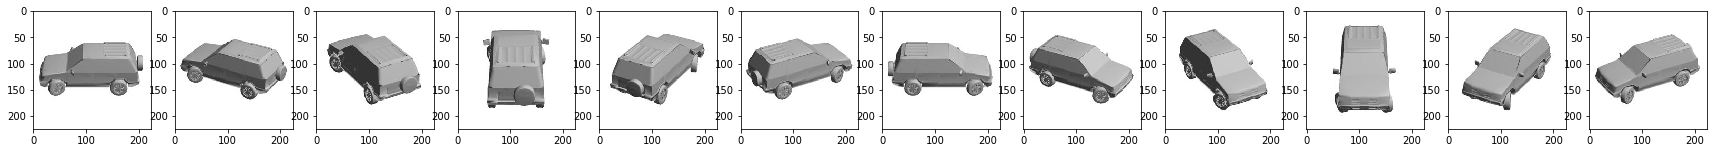

chair
000000294


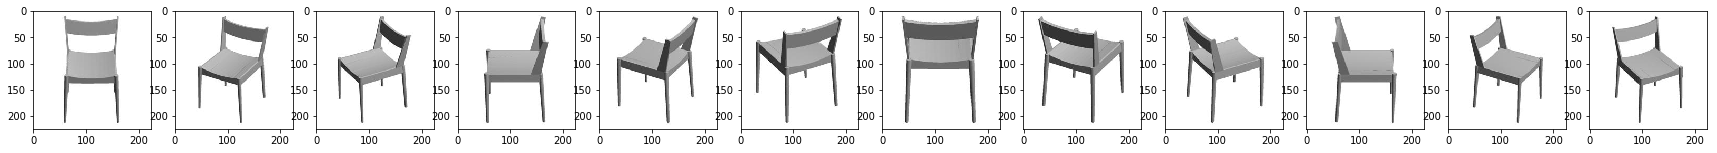

cone
000000942


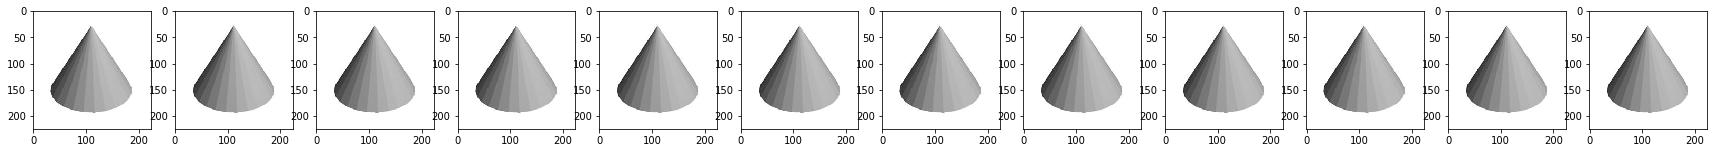

cup
000001547


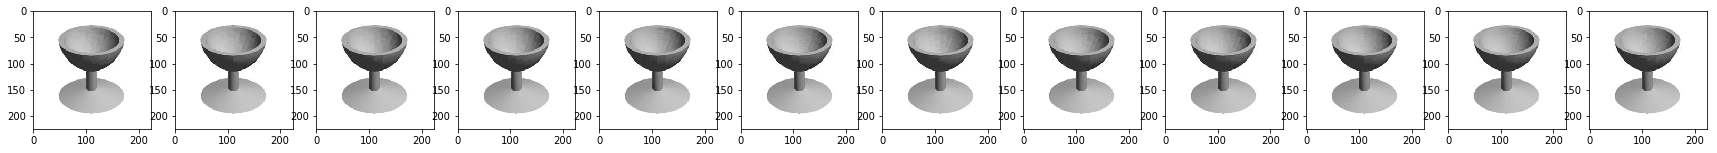

curtain
000000508


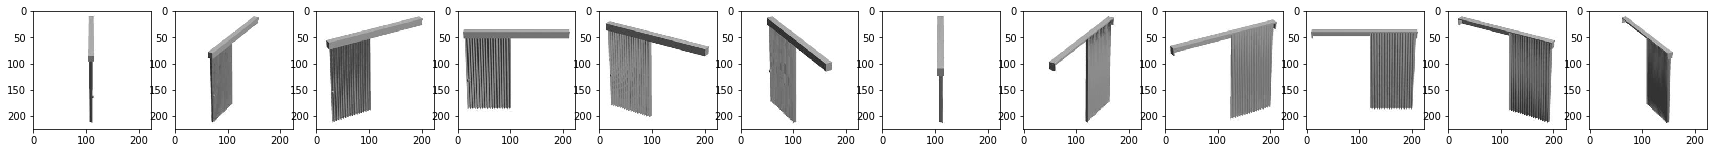

desk
000000671


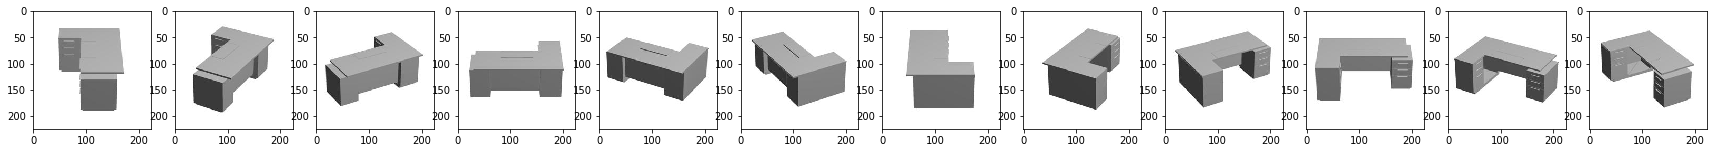

door
000000503


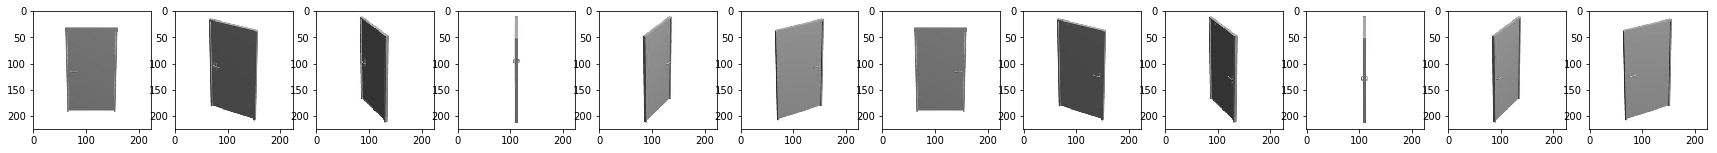

dresser
000001240


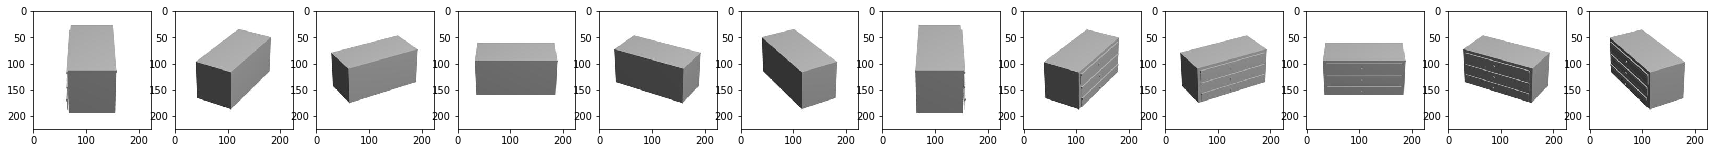

flower_pot
000000212


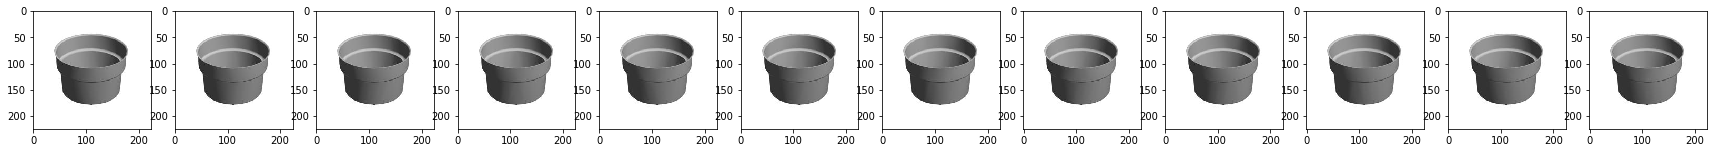

glass_box
000000127


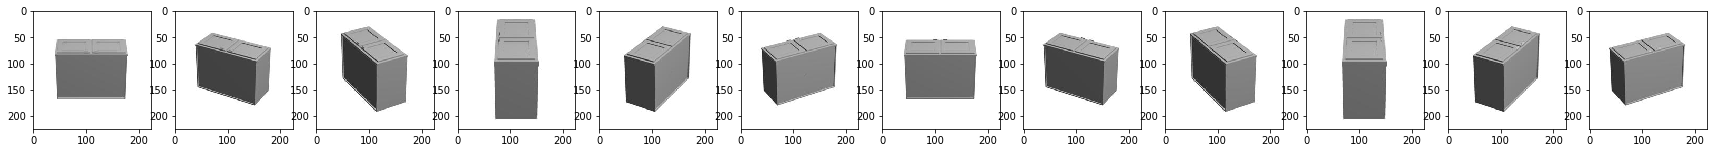

guitar
000000151


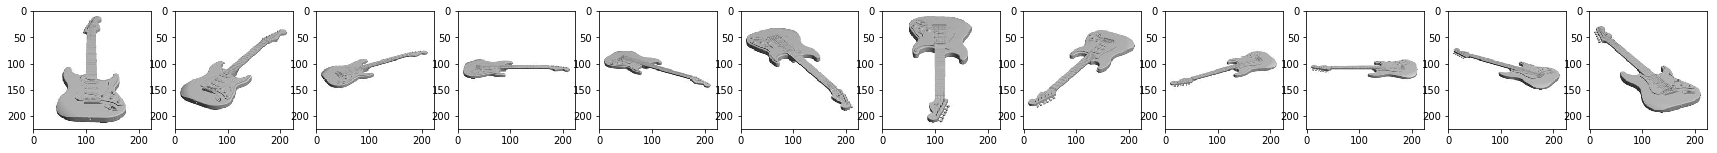

keyboard
000000408


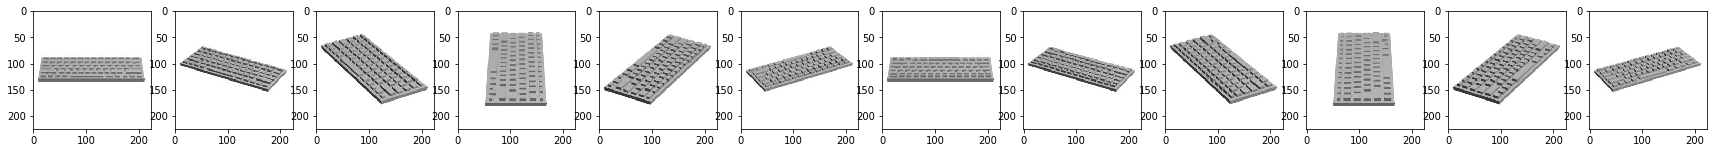

lamp
000000641


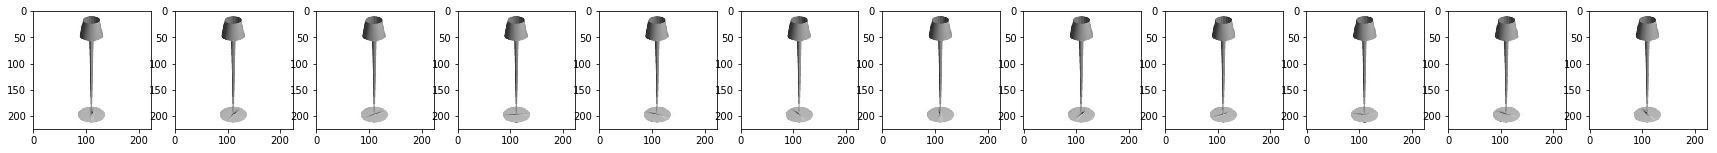

laptop
000000098


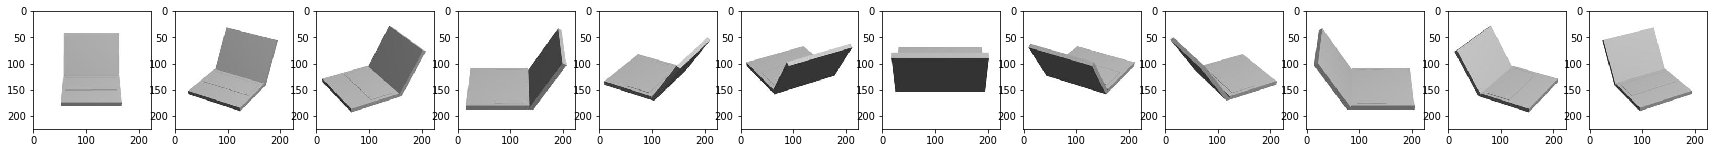

mantel
000000101


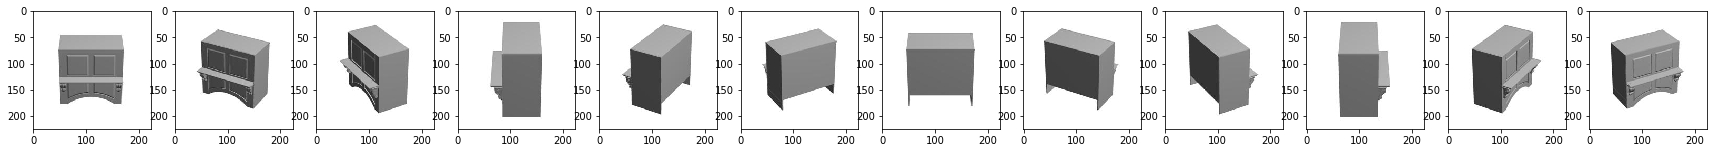

monitor
000000500


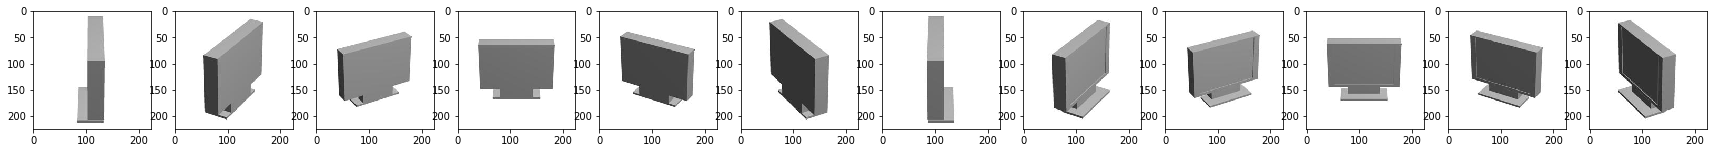

night_stand
000000417


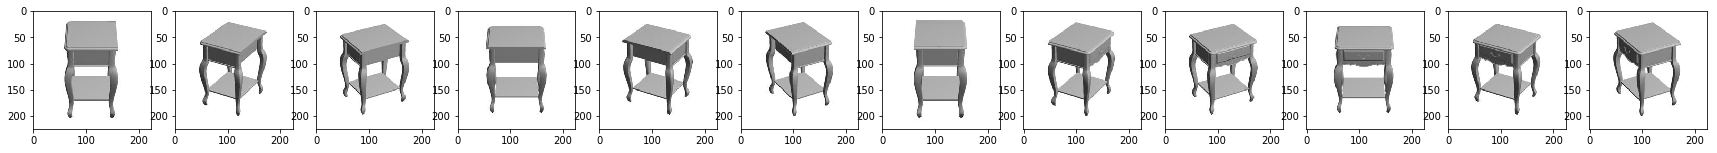

person
000000823


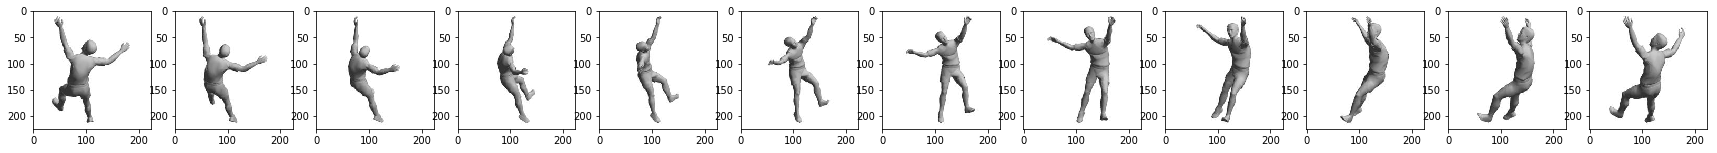

piano
000000065


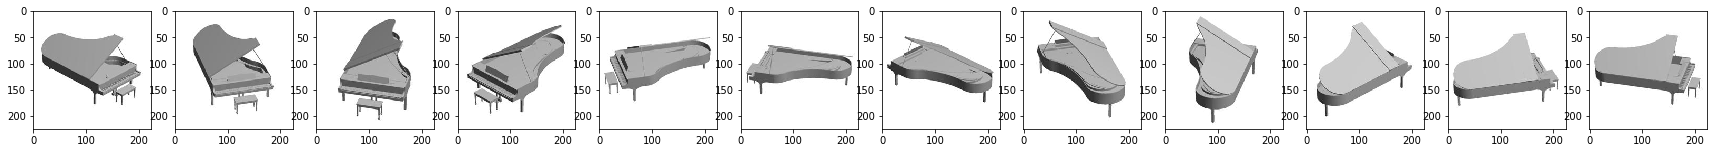

plant
000000324


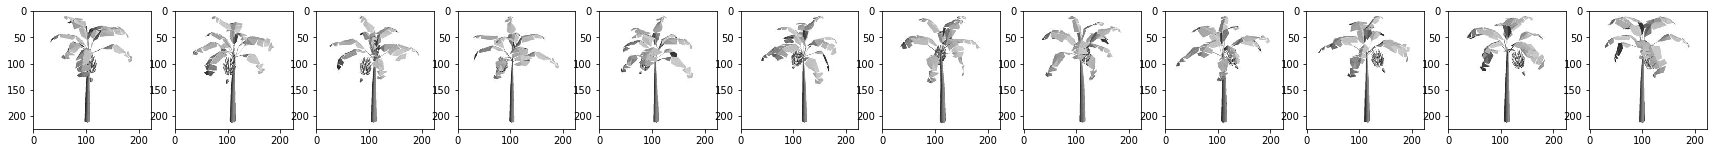

radio
000000417


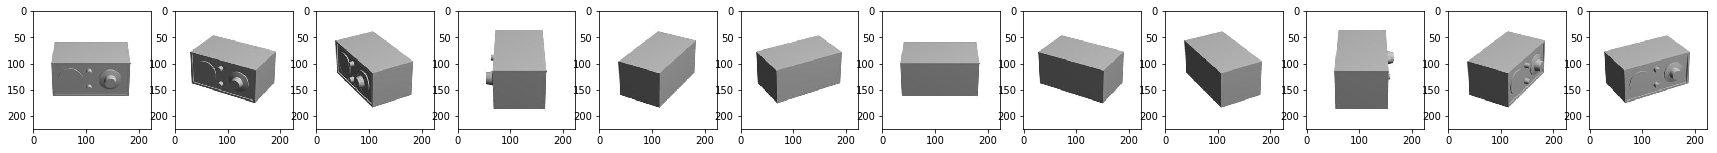

range_hood
000000250


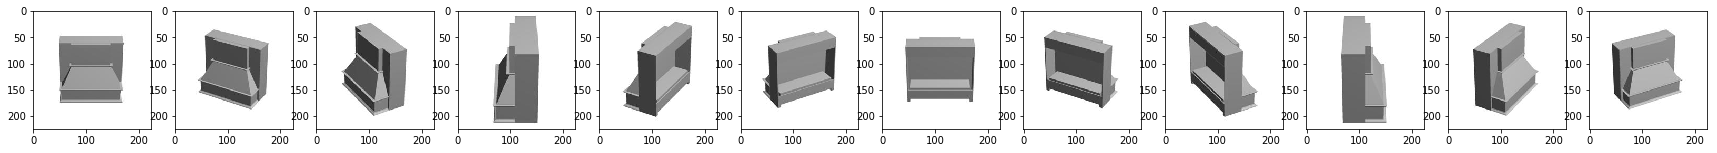

sink
000000886


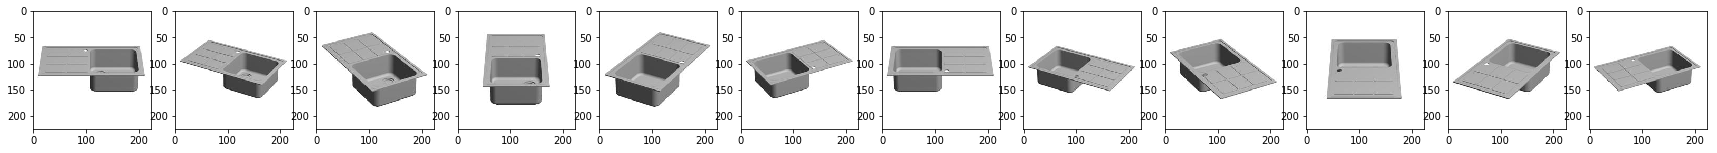

sofa
000000380


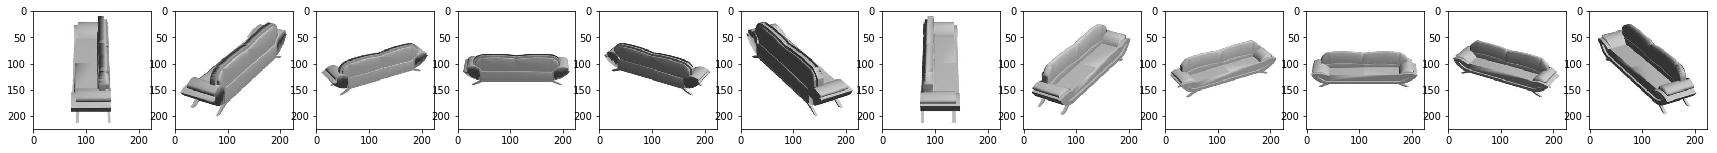

stairs
000000681


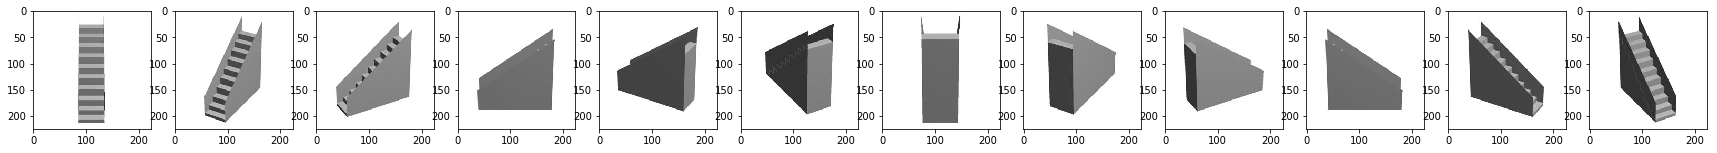

stool
000001175


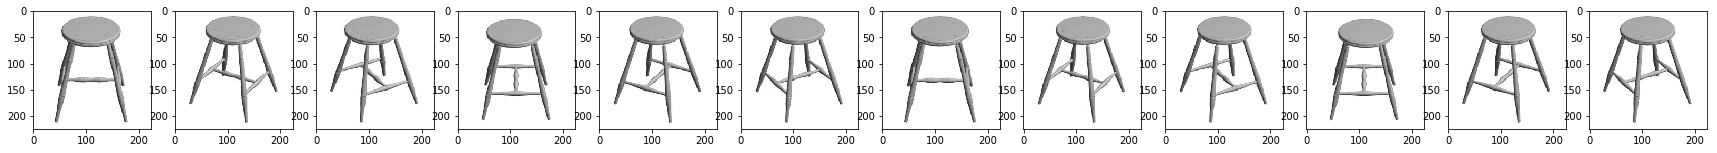

table
000000470


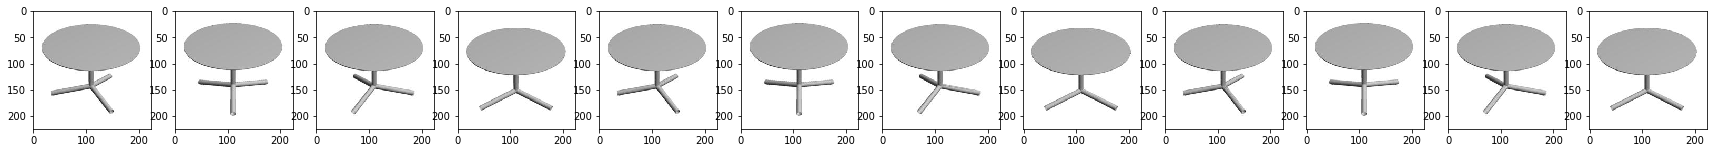

tent
000000088


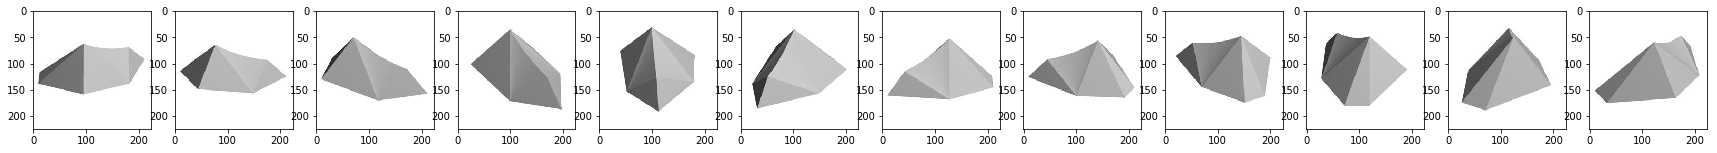

toilet
000000791


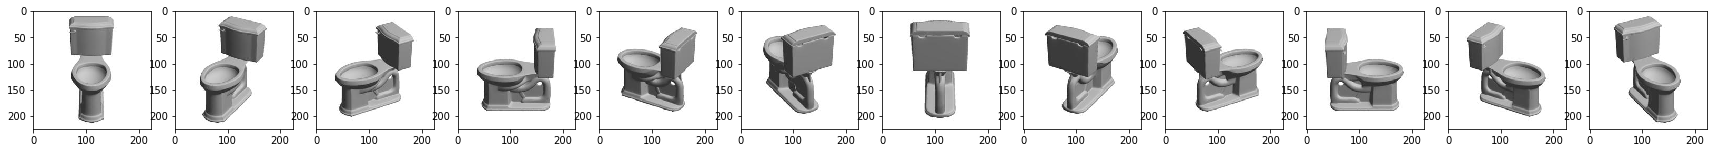

tv_stand
000000268


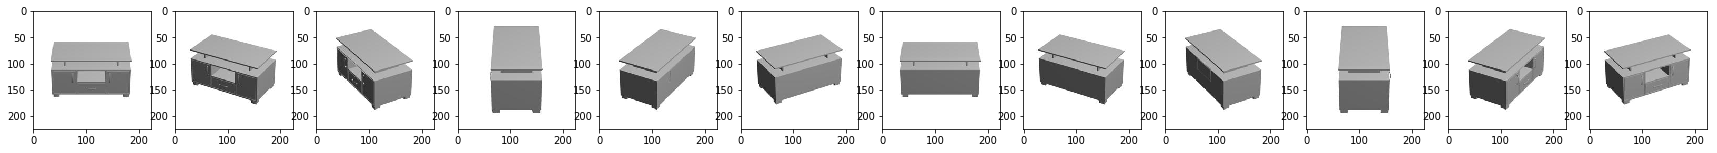

vase
000000097


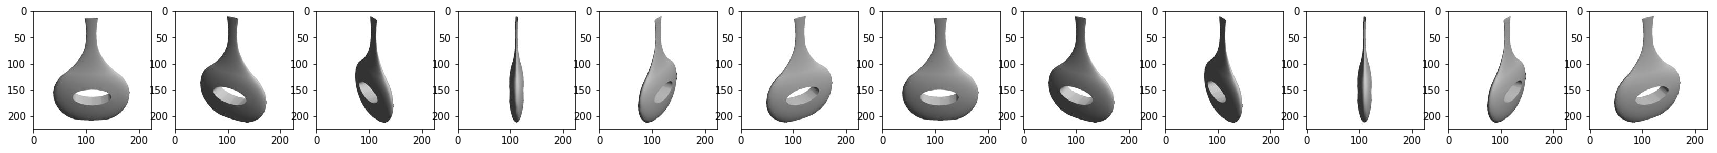

wardrobe
000001119


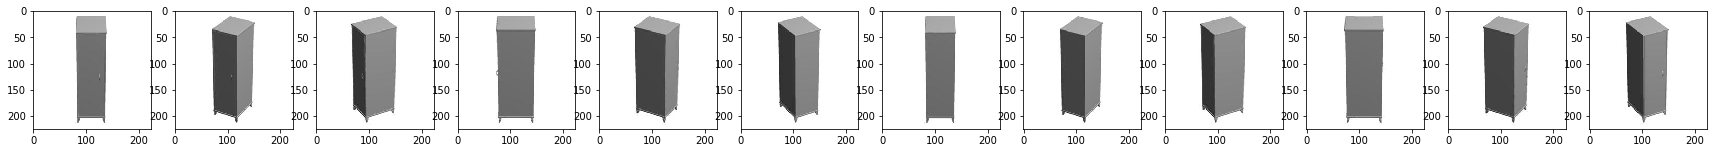

xbox
000000126


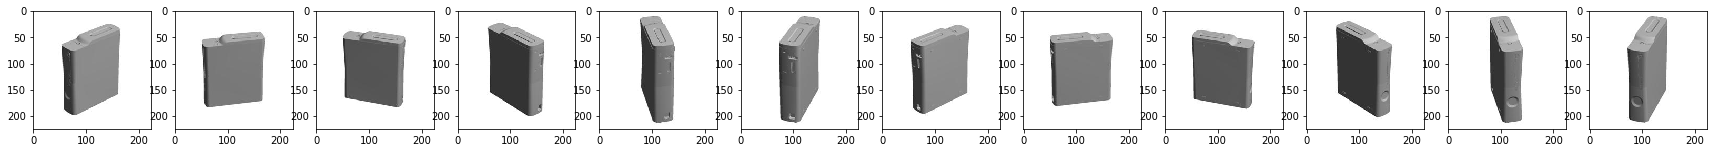

In [25]:
for class_id in train_df['class_id'].unique():
    train_data.view_random_instances(class_id)